## Exploratory Data Analysis in Python 
#### Investigating Netflix Movies

### Overview

Perform exploratory data analysis on the `netflix_data.csv` data to understand what may be contributing

to movies getting shorter over time.

**netflix_data.csv**

| **Column**     | **Description**                 |
|----------------|---------------------------------|
| `show_id`      | The ID of the show              |
| `type`         | Type of show                    |
| `title`        | Title of the show               |
| `director`     | Director of the show            |
| `cast`         | Cast of the show                |
| `country`      | Country of origin               |
| `date_added`   | Date added to Netflix           |
| `release_year` | Year of Netflix release         |
| `duration`     | Duration of the show in minutes |
| `description`  | Description of the show         |
| `genre`        | Show genre                      |

In [1]:
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

*Load the CSV file and store as `netflix_df`.*

In [3]:
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies


*Filter the data to remove TV shows and store as `netflix_subset`.*

In [4]:
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']
netflix_subset.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action


*Save the columns `title`, `country`, `genre`, `release_year`, and `duration` into a new DataFrame  
called `netflix_movies`.*

In [6]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
netflix_movies.head(3)

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80


*Filter `netflix_movies` and save movies shorter than 60 minutes into a new DataFrame called   
`short_movies`.*

In [37]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies.head(10)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


*Iterate the rows of `netflix_movies` and assign different colors to four genre groups ('Children',  
'Documentaries', 'Stand-Up', and 'Other' for all other genres). Save the results in a `colors` list.*

In [35]:
colors=[]
for lab, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('#519DE9')
    elif row['genre'] == 'Documentaries':
        colors.append('#7CC674')
    elif row['genre'] == 'Stand-Up':
        colors.append('#73C5C5')
    else:
        colors.append('#F0F0F0')

*Create a scatter plot for movie duration by release year using the `colors` list to color the   
points.*

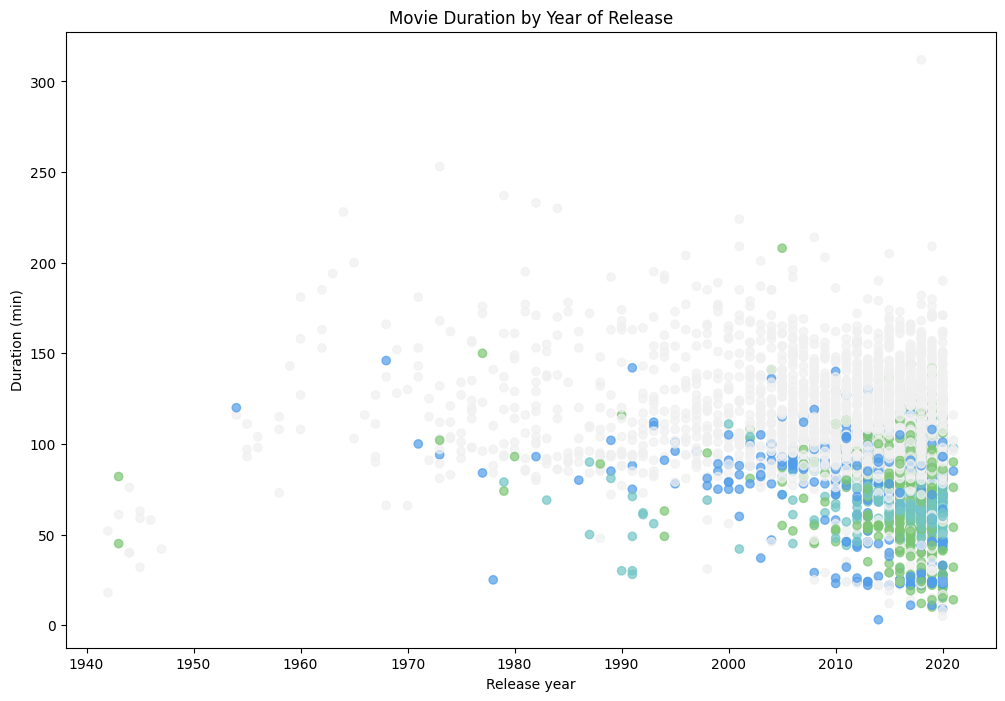

In [39]:
year = netflix_movies['release_year']
length = netflix_movies['duration']

fig = plt.figure(figsize=(12,8))
plt.scatter(year, length, c=colors, alpha=0.7)

plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')

plt.show()

### Conclusion

*From the plot, we can see that movies in the 'Children', 'Documentaries', and 'Stand Up' genres,   
generally have a shorter duration. However, we cannot say with certainty that movies are getting   
shorter over time.*
